<a href="https://colab.research.google.com/github/iashyam/Computation-QM/blob/main/1D_eiogenvalue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
import numpy.linalg as lin

plt.style.use('seaborn-whitegrid')

%matplotlib inline

#### Square Well Potential
\begin{equation}
V(x) = 
\begin{cases}
-10 && if && |x|<a \\
0 && elsewhere
\end{cases}
\end{equation}

The natural length scale here is the width of well $a$.
And natural energy scale turn out to be $\dfrac{\hbar^2}{2ma^2}$

#### Harmonic Osicalltor potential

$$V(y) = y^2$$

Natural length scale here is $\hbar\omega/2$ and natural length scale here is $l_0 = \sqrt{\frac{\hbar}{m\omega}}$

#### Hygrogen Atom Radial Equation

\begin{equation}
\frac{d^2 u }{dr^2} = \frac{2\mu}{\hbar}\left(V(r) - E\right)u
\end{equation}

Taking ground state energy $E_0 = -13.6eV$ as natural energy scale and $l_o = \sqrt{\frac{\hbar^2}{2mE_0}}$ as natural length scale we get 

$\mathcal{U}(y) = - \dfrac{ke^2}{l_0 E_0}\dfrac{1}{y}$



$$H_{i,j} = -\frac{1}{\Delta^2}(\delta_{i+1,j} + \delta_{i-1,j} - \delta_{1,j}) + V(\Delta i)*\delta_{i,j}$$

$y$  $\epsilon$ $[0,1]$

In [27]:
n = 400 #number of states we want to know
y = np.linspace(-6,6,2*n)
Delta = y[1]-y[0]

In [39]:
def k(i,j): #kronekar delta function
    return 1 if i==j else 0

def V(x):
    # return x**2 #for harmonic potential
    return -50 if abs(x)<1 else 0 #for square well
    # return (-k*e**2/l0) *(1/x) # for hygrogen atom 

In [68]:
def Hemiltonian(i,j):
    return (-1/Delta**2)*(k(i+1,j)+k(i-1,j)-2*k(i,j)) + V(Delta*i)*k(i,j)

In [69]:
H = np.array([[Hemiltonian(i,j) for i in range(-n,n)] for j in range(-n,n)])
len(range(1,n))

99

In [80]:
eval, evac = lin.eig(H)

In [71]:
sort_eval = np.sort(eval)

In [72]:
idx = eval.argsort()
eval = eval[idx]
evac = evac[:,idx]
psi1 = evac[:,1]
psi2 = evac[:,2]
psi0 = evac[:,0]

potential = 0.006*np.array([V(Delta*i) for i in range(1,n)])

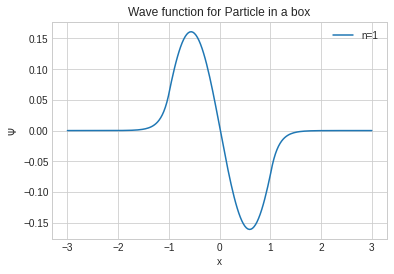

In [75]:
plt.plot(y,psi1, label="n=1")
# plt.plot(y,psi2, label="n=2")
# plt.plot(y,psi0, label="n=0")
# plt.plot(y, potential, label="Potential")
plt.ylabel(r'$\Psi$')
plt.xlabel('x')
plt.title('Wave function for Particle in a box')
plt.legend();

In [13]:
print(eval[0])

2.9993638658266395


## Double Potential well

Let's say we have double potential well as

\begin{equation}
V(x) = \begin{cases}
V_1 & \frac{b}{2} < x < \frac{a}{2} \\
V_2 &  0< x <\frac{b}{2} \\
V(-x) & x<0
\end{cases}
\end{equation}

In [ ]:
a = 2
b = 1
def V(x):
    V1 = -10
    V2 = -5
    if abs(x) > b/2 and abs(x) < a/2:
        return V1
    elif abs(x) < b/2:
        return V2
    else:
        return 0

In [ ]:
n = 1000 #number of states we want to know
y = np.linspace(-2,2,2*n)
Delta = y[1]-y[0]

In [ ]:
H = np.array([[Hemiltonian(i,j) for i in range(-n,n)] for j in range(-n,n)])

In [ ]:
eval, evac = lin.eig(H)

In [ ]:
idx = eval.argsort()
eval = eval[idx]
evac = evac[:,idx]
psi1 = evac[:,1]
psi2 = evac[:,2]
psi0 = evac[:,0]

potential = 0.006*np.array([V(Delta*i) for i in range(-n,n)])

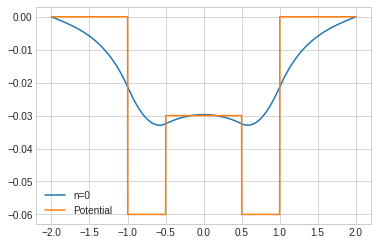

In [ ]:
plt.plot(y,psi0, label="n=0")
plt.plot(y, potential, label="Potential")
plt.legend()

In [ ]:
eval[1]

-3.5692471115960975

### Lennard Jones Potential

\begin{equation}
V(x) = a\left(\frac{x^2 - b^2}{b^2}\right)^2
\end{equation}

I am taking $a$ as natuarl energy salce and $l_0 = \sqrt{\dfrac{\hbar^2}{2ma^2}}$ as natural length scale


In [46]:
import numpy as np
import math
import matplotlib.pyplot as plt
import numpy.linalg as lin

In [47]:
h = 6.67e-34 #plank constant
hbar = h/math.pi
qe = 1.6e-19 #chrage of electron
m =9.1e-31 #mass of electron

In [50]:
a = 10*qe

In [51]:
b = 2e-10

In [52]:
l0 =math.sqrt( hbar**2/(2*m*a))

In [53]:
def V(x):
    return ((l0*x/b)**2-1)**2

In [54]:
n = 100 #number of states we want to know
y = np.linspace(-3,3,2*n)
Delta = y[1]-y[0]

In [55]:
def k(i,j):
    return 1 if i==j else 0

def Hemiltonian(i,j):
    return (-1/Delta**2)*(k(i+1,j)+k(i-1,j)-2*k(i,j)) + V(Delta*i)*k(i,j)
    
H = np.array([[Hemiltonian(i,j) for i in range(-n,n)] for j in range(-n,n)])

In [56]:
eval, evac = lin.eig(H)

In [57]:
idx = eval.argsort()
eval = eval[idx]
evac = evac[:,idx]
psi1 = evac[:,1]
psi2 = evac[:,2]
psi0 = evac[:,0]



Text(0.5, 1.0, 'First Excited State')

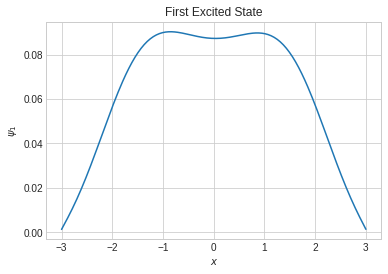

In [59]:
plt.plot(y,psi0, label="n=0")
plt.ylabel(r'$\psi_1$')
plt.xlabel(r'$x$')
plt.title('First Excited State')

In [60]:
eval[0]

0.8251261941677884

In [61]:
eval[1]
eval[1]-eval[0]

0.6435520524651223

Text(0.5, 1.0, 'Potential')

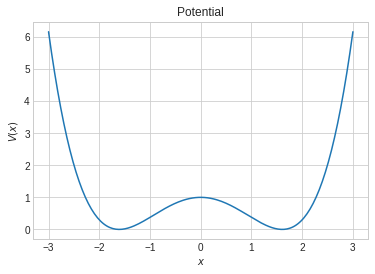

In [62]:
plt.plot(y, V(y))
plt.ylabel(r'$V(x)$')
plt.xlabel(r'$x$')
plt.title('Potential')

In [64]:
def Va(a):
    h = 6.64e-34
    qe = 1.6e-19
    m = 9.1e-31
    b = 2*1e-10
    l0 =math.sqrt(h**2/(2*m*a*qe))
    def f(x):
        return ((l0*x/b)**2-1)**2
    return f

In [65]:
A_list =np.linspace(10,50,50)
E_requard = []
for a in A_list:
    n = 100 
    y = np.linspace(-3,3,2*n)
    Delta = y[1]-y[0]
    V = Va(a)
    def Hemiltonian(i,j):
        return (-1/Delta**2)*(k(i+1,j)+k(i-1,j)-2*k(i,j)) + V(Delta*i)*k(i,j)
    H = np.array([[Hemiltonian(i,j) for i in range(-n,n)] for j in range(-n,n)])
    eval, evac = lin.eig(H)
    idx = eval.argsort()
    eval = eval[idx]
    E_requard.append(eval[1]-eval[0])

Text(0, 0.5, 'E')

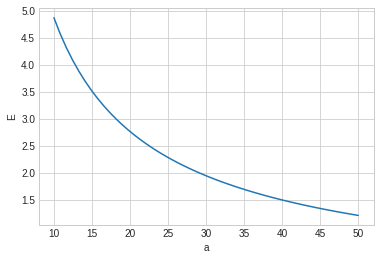

In [76]:
plt.plot(A_list,E_requard)
plt.xlabel('a')
plt.ylabel('E')

## Hydrogen Atom

In [76]:
import numpy as np
import math
import matplotlib.pyplot as plt
import numpy.linalg as lin

In [94]:
h = 6.62e-34 #plank constant
hbar = h/2*math.pi
m = 9.1e-31 #electron mass
K = 9e9 #1/4pie 
e = 1.6e-19 #electron charge
E0 = 13.6*e #ground state energy in joule

l0 = math.sqrt((hbar**2)/(2*m*E0)) #natrual length scale
b = (K*e**2)/(l0*E0)
b

0.20263331844755425

In [90]:
n = 400 #number of states we want to know
h = 0.01

In [100]:
def k(i,j): #kronekar delta function
    return 1 if i==j else 0

def V(x):
    return - b/x  # for hygrogen atom 

In [101]:
def Hemiltonian(i,j):
    return (-1/Delta**2)*(k(i+1,j)+k(i-1,j)-2*k(i,j)) + V(Delta*i)*k(i,j)

H = np.array([[Hemiltonian(i,j) for i in range(1,2*n+1)] for j in range(1,2*n+1)])
ys = np.array([i*h for i in range(1,2*n+1)])
eval, evac = lin.eig(H)
sort_eval = np.sort(eval)
idx = eval.argsort()
eval = eval[idx]
evac = evac[:,idx]
psi1 = evac[:,1]
psi2 = evac[:,2]
psi0 = evac[:,0]


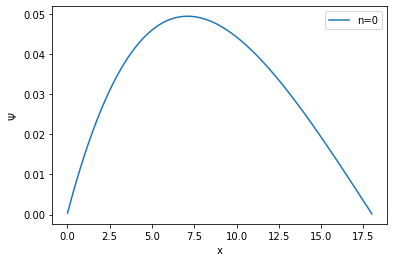

In [106]:
potential = V(y)
# plt.plot(y,psi1, label="n=1")
# plt.plot(y,psi2, label="n=2")
plt.plot(y,psi0, label="n=0")
# plt.plot(y,psi0/y, label='R')
# plt.plot(y, potential, label="Potential")
plt.ylabel(r'$\Psi$')
plt.xlabel('x')
plt.legend();

In [103]:
eval[2]

0.23293420348368932